In [39]:
import torch
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionInpaintPipeline
from diffusers import utils
from diffusers import UNet2DConditionModel

from torchvision.utils import save_image
import csv
import IPython.display as ipd

import matplotlib.pyplot as plt
import PIL
import requests
import torch
from io import BytesIO
from torchvision.utils import save_image
import jsonlines
from tqdm import tqdm
import skimage
import librosa
import numpy as np
from scipy.io.wavfile import write
import argparse, os, sys, datetime, glob, importlib, csv
import numpy as np
import time
import torch
import torchvision
import pytorch_lightning as pl
from matplotlib import image
import matplotlib.gridspec as gridspec

from packaging import version
from omegaconf import OmegaConf
from torch.utils.data import random_split, DataLoader, Dataset, Subset
from functools import partial
from PIL import Image

from pytorch_lightning import seed_everything
from pytorch_lightning.trainer import Trainer
from pytorch_lightning.callbacks import ModelCheckpoint, Callback, LearningRateMonitor
from pytorch_lightning.utilities.distributed import rank_zero_only
from pytorch_lightning.utilities import rank_zero_info

from ldm.util import instantiate_from_config
sys.path.append(os.getcwd())
import cv2
import torchaudio
import torchaudio.transforms as transforms
import time

import matplotlib.pyplot as plt
from noise import pnoise2
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
model_path = "C:\\Users\\Jackson\\Documents\\research\\outputs\\spec-model-128"

# model_path = "C:\\Users\\Jackson\\Documents\\research\\stable-diffusion-v1-4"




In [3]:
# model_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_path, device_map=None, safety_checker=None)
pipe.to("cuda")



The config attributes {'requires_safety_checker': True} were passed to StableDiffusionPipeline, but are not expected and will be ignored. Please verify your model_index.json configuration file.
The config attributes {'class_embed_type': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'dual_cross_attention': False, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'num_class_embeds': None, 'only_cross_attention': False, 'resnet_time_scale_shift': 'default', 'time_cond_proj_dim': None, 'time_embedding_type': 'positional', 'timestep_post_act': None, 'upcast_attention': False, 'use_linear_projection': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
You have passed `None` for safety_checker to disable its functionality in <class 'diffuse

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.5.1",
  "feature_extractor": [
    "transformers",
    "CLIPFeatureExtractor"
  ],
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [5]:
models = [
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-2500\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-4000\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-7500\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-10000\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-12500\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-15000\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-17500\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-20000\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-22500\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\checkpoint-25000\\unet",
    "C:\\Users\\Jackson\\Documents\\research\\diffusers\\examples\\text_to_image\\spec-model-128\\unet"
]

conf = "C:\\Users\\Jackson\\Documents\\research\\outputs\\checkpoint-10000\\unet"


# conf = models[-1]

new_unet = UNet2DConditionModel.from_pretrained(conf)
new_unet.to("cuda")
pipe.unet = new_unet

The config attributes {'class_embed_type': None, 'conv_in_kernel': 3, 'conv_out_kernel': 3, 'dual_cross_attention': False, 'mid_block_type': 'UNetMidBlock2DCrossAttn', 'num_class_embeds': None, 'only_cross_attention': False, 'projection_class_embeddings_input_dim': None, 'resnet_time_scale_shift': 'default', 'time_cond_proj_dim': None, 'time_embedding_type': 'positional', 'timestep_post_act': None, 'upcast_attention': False, 'use_linear_projection': False} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


In [103]:
prompts = ["a spectrogram of the sounds of a sin wave",
          # "a spectrogram of the sounds singing and music and song",
          # "a spectrogram of the sounds of a truck idle engine sound",
          # "a spectrogram of the sounds of a whip whipping",
          # "A mel spectrogram of the sound of Humming",
          "A mel spectrogram of the sound of a dog barking, howling, bark",
           # "A mel spectrogram of the sound of Speech, Singing, and Yodeling",
           # "A mel spectrogram of the sound of Hammer",
           "A mel spectrogram of the sound of Brass instrument, and Saxophone"
          ]


imgs = [pipe(prompt=p, width=1024, height=128, num_inference_steps=200, output_type="np").images[0] for p in prompts]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 201/201 [00:17<00:00, 11.39it/s]


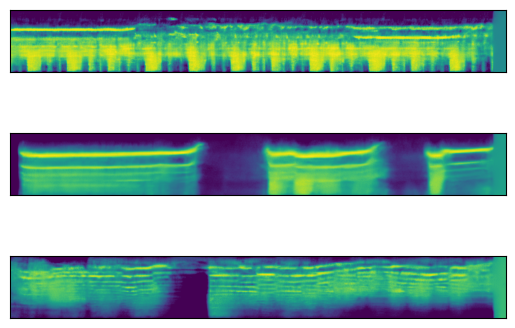

In [104]:
fig, axs = plt.subplots(len(prompts),1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0.0, 'wspace': 0.1})
plt.figsize=(20,20)
for i in range(len(prompts)):
    img = imgs[i]
    np_img = np.array(img)[:,:,0]
    axs[i].imshow(np_img, cmap='viridis')
    axs[i].tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

In [51]:
img = np.array(imgs[-1])
print(img.min())
print(img.max())
print(img.mean())

0
224
102.93135833740234


In [135]:

f_path = "C:\\Users\\Jackson\\Documents\\research\\data\\generated_wav\\infer_test.wav"


239
23
1.0
0.0
25.0
-150.0
(1, 64, 400)


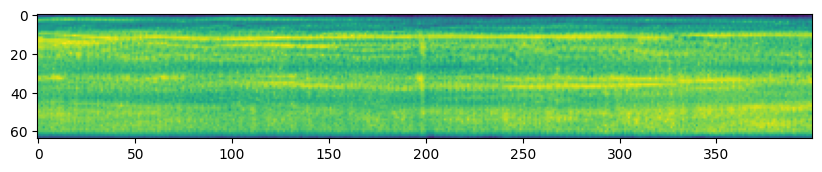

In [74]:
n_fft=1600
win_length=1200
hop_length=800
n_mels=64
pad_mode="constant"
mel_scale='htk'
target_length = 128

print(np_img.max())
print(np_img.min())

rescale = np_img.astype(np.float32)
rescale -= rescale.min()
rescale /= rescale.max()

print(rescale.max())
print(rescale.min())

rescale *= 175
rescale -= 150
rescale = rescale[None, :, :]

print(rescale.max())
print(rescale.min())
print(rescale.shape)
plt.imshow(rescale[0], cmap='viridis')

sr = 16000

inverse_melscale_transform = transforms.InverseMelScale(n_stft=n_fft // 2 + 1,
                                                       n_mels=n_mels,
                                                       sample_rate = sr,
                                                       norm=None,
                                                       mel_scale=mel_scale)

spectrogram = inverse_melscale_transform(torch.from_numpy(rescale))

transform = transforms.GriffinLim(n_fft=n_fft, n_iter=128, momentum=0,)
waveform = transform(spectrogram)


In [61]:
n_fft=1024
hop_length=160
sample_rate=22050
n_mels=128
melspec=torchaudio.transforms.MelSpectrogram(n_fft=1024,sample_rate=16000, hop_length=160, n_mels=128)
to_db=torchaudio.transforms.AmplitudeToDB()
inv_melspec=torchaudio.transforms.InverseMelScale(n_stft=n_fft//2+1,sample_rate=sample_rate)
griffin_lim = torchaudio.transforms.GriffinLim(n_fft=n_fft,hop_length=hop_length)

def wav2fbank(waveform, db=True):
    if isinstance(waveform, str):
        waveform, sr = torchaudio.load(waveform)
    else:
        waveform = torch.Tensor(waveform)
    waveform = waveform - waveform.mean()
    #print(waveform.shape)
    fbank = melspec(waveform.squeeze())
    fbank0 = fbank.T
    if db:
        fbank=to_db(fbank)
    fbank = fbank.T
    n_frames = fbank.shape[0]
    TARGET_LEN=1024
    p = TARGET_LEN - n_frames
    if p > 0:
        m = torch.nn.ZeroPad2d((0, 0, 0, p))
        fbank = m(fbank)
    elif p < 0:
        fbank = fbank[0:TARGET_LEN, :]
    return fbank, fbank0

def norm_fbank(fbank, db=True):
    if db:
        norm_mean = -10.000181
        norm_std = 15.642561
    else:
        norm_mean= -4.2677393
        norm_std= 4.5689974
    fbank = (fbank - norm_mean) / (norm_std * 2)
    return fbank

def unnorm_fbank(norm_fbank, db=True):
    if db:
        norm_mean = -10.000181
        norm_std = 15.642561
    else:
        norm_mean= -4.2677393
        norm_std= 4.5689974
    fbank = norm_fbank * (norm_std * 2) + norm_mean
    return fbank
def db2amp(db):
    return torch.pow(10, db/10)

def restore_wav(input_fbank):
    fbank = input_fbank[0].squeeze().T
    # un-normalize
    fbank = unnorm_fbank(fbank)
    # un-db
    fbank = db2amp(fbank)
    # inverse-melspec
    print('inv-melspec')
    stft_spec = inv_melspec(fbank)
    print('inv-melspec-finished')
    # do griffin_lim
    print('griffin_lim')
    waveform = griffin_lim(stft_spec)
    print('griffin_lim-finished')
    return waveform

def display_fbank(bank, minmin=None, maxmax=None):
    plt.figure(figsize=(8, 4))
    plt.imshow(10*bank.T.numpy(), origin='lower', interpolation='nearest', vmax=maxmax, vmin=minmin,  aspect='auto')
    plt.axis('off')

In [36]:
fbank = np.array(imgs[-1])
fbank = torch.from_numpy(fbank).T
print(fbank.shape)
# plt.imshow(fbank)

torch.Size([3, 1024, 128])


In [37]:
wav = restore_wav(fbank)

inv-melspec
inv-melspec-finished
griffin_lim
griffin_lim-finished


In [40]:
ipd.Audio(wav, rate=16000)

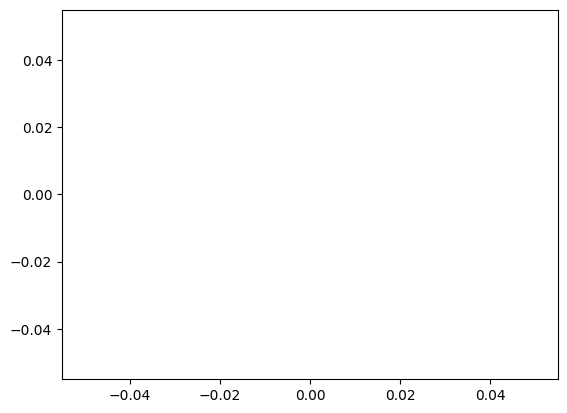

In [43]:
plt.plot(wav)

torch.Size([1, 1024, 128])


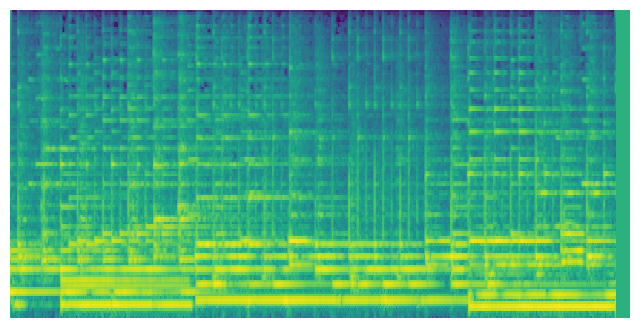

In [66]:
f_path = "C:\\Users\\Jackson\\Documents\\research\\data\\wav_files\\music.wav"

fbank, f0 = wav2fbank(f_path)
fbank = norm_fbank(fbank)
x = fbank
x = x.unsqueeze(dim=0)
# x = x.unsqueeze(dim=0)
print(x.shape)
display_fbank(x)


In [68]:
recon = restore_wav(x)

inv-melspec
inv-melspec-finished
griffin_lim
griffin_lim-finished


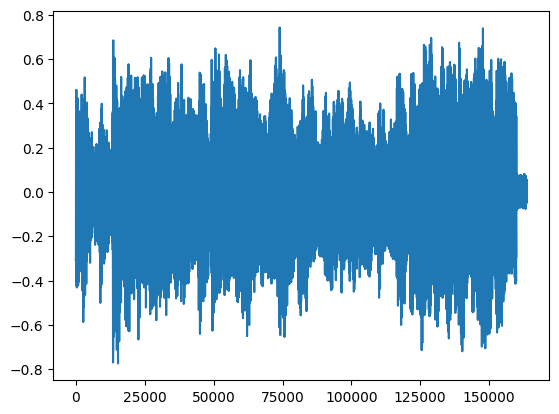

In [69]:
plt.plot(recon)
ipd.Audio(recon, rate=16000)

<class 'numpy.ndarray'>


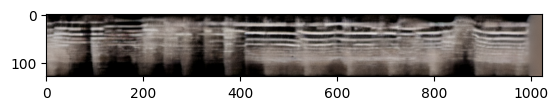

In [88]:
plt.imshow(imgs[-1])
print(type(imgs[-1]))

tensor(0.)
tensor(0.8823)
tensor(0.3561)
tensor(0.2565)
torch.Size([1, 1024, 128])
NEW
tensor(-2.)
tensor(1.5292)
tensor(-0.5754)
tensor(1.0261)
torch.Size([1, 1024, 128])


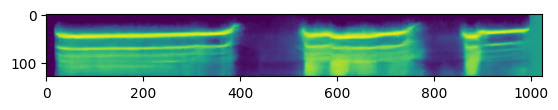

In [107]:
img = torch.tensor(imgs[-2][:,:,:1].T)
print(img.min())
print(img.max())
print(img.mean())
print(img.std())
print(img.shape)

img = img * 4
img = img - 2
print("NEW")
print(img.min())
print(img.max())
print(img.mean())
print(img.std())
print(img.shape)
plt.imshow(img.T)

In [ ]:
gen_recon = restore_wav(img)

inv-melspec


In [ ]:
plt.plot(gen_recon)
ipd.Audio(gen_recon, rate=16000)

In [76]:
print(gen_recon)

tensor([nan, nan, nan,  ..., nan, nan, nan])


In [91]:
print(x.min())
print(x.max())
print(x.mean())
print(x.std())
print(x.shape)

tensor(-1.7760)
tensor(1.4958)
tensor(0.1525)
tensor(0.5307)
torch.Size([1, 1024, 128])
